# IMPORT LIBRARIES AND DATASETS


In [2]:
!pip install --upgrade seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [3]:
!pip install --upgrade pandas

  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2


In [4]:
# Import required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# Read the dataset
Kyphosis_df = pd.read_csv("kyphosis.csv")

In [6]:
Kyphosis_df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [7]:
Kyphosis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


**PRACTICE OPPORTUNITY #1 [OPTIONAL]:**
- **List the average, minimum and maximum age (in years) considered in this study using two different methods**

In [8]:
Kyphosis_df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


# PERFORM DATA VISUALIZATION

In [9]:
Kyphosis_df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [10]:
# Perform label encoding for classification
# Absent=0, Present=1

from sklearn.preprocessing import LabelEncoder
LabelEncoder_y = LabelEncoder()
Kyphosis_df['Kyphosis'] = LabelEncoder_y.fit_transform(Kyphosis_df['Kyphosis'])

In [11]:
Kyphosis_df

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [12]:
Kyphosis_True = Kyphosis_df[Kyphosis_df['Kyphosis']==1]

In [13]:
Kyphosis_False = Kyphosis_df[Kyphosis_df['Kyphosis']==0]

In [14]:
print( 'Disease present after operation percentage =', (len(Kyphosis_True) / len(Kyphosis_df) )*100,"%")

Disease present after operation percentage = 20.98765432098765 %


In [15]:
Kyphosis_df.corr()

,Kyphosis,Age,Number,Start
Kyphosis,1.000000,0.126465,0.360935,-0.445943
Age,0.126465,1.000000,-0.016687,0.057828
Number,0.360935,-0.016687,1.000000,-0.425099
Start,-0.445943,0.057828,-0.425099,1.000000


<Axes: >

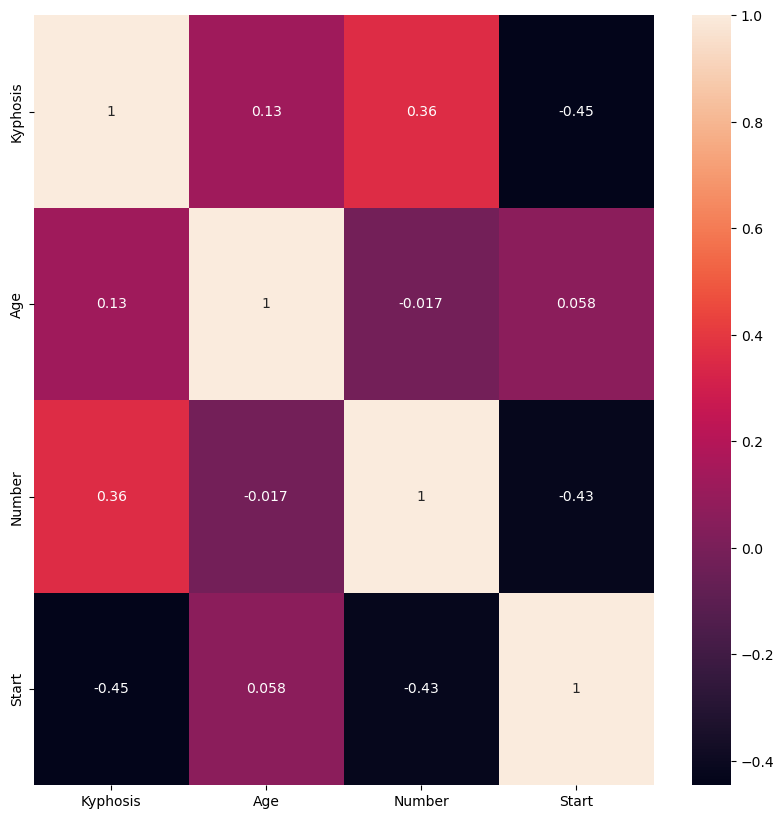

In [16]:
plt.figure(figsize=(10,10)) 
sns.heatmap(Kyphosis_df.corr(), annot=True) 

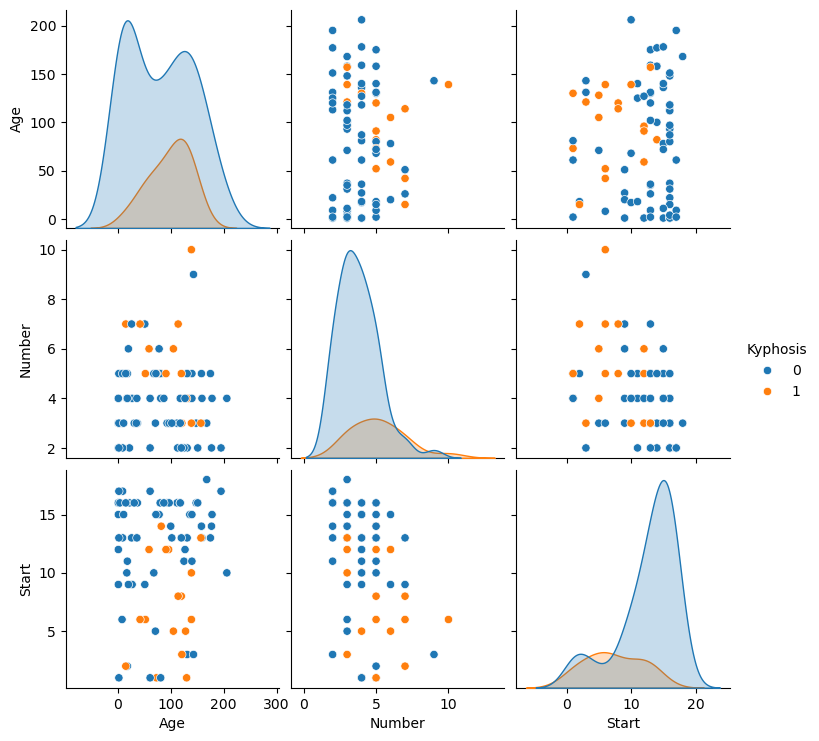

In [17]:
sns.pairplot(Kyphosis_df, hue='Kyphosis', vars = ['Age', 'Number', 'Start']);

<Axes: xlabel='Kyphosis', ylabel='count'>

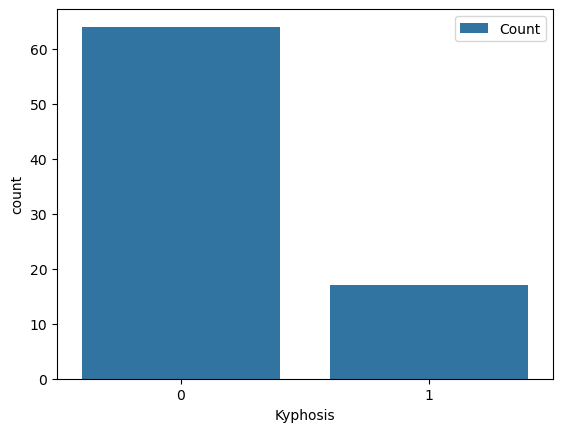

In [18]:
sns.countplot(x = Kyphosis_df['Kyphosis'], label = 'Count')

In [22]:
# Let's drop the target label coloumns
X = Kyphosis_df.drop(['Kyphosis'],axis=1)
y = Kyphosis_df['Kyphosis']


In [23]:
X

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [24]:
y

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)


In [28]:
Kyphosis_df

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [29]:
X_train.shape

(60, 3)

In [30]:
y_train.shape

(60,)

In [31]:
X_test.shape

(21, 3)

In [32]:
y_test.shape

(21,)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

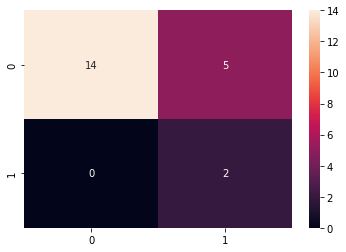

In [38]:
# Predicting the Test set results
y_predict_test = knn_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [39]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.74      0.85        19
           1       0.29      1.00      0.44         2

    accuracy                           0.76        21
   macro avg       0.64      0.87      0.65        21
weighted avg       0.93      0.76      0.81        21



# TRAIN A KNN MODEL IN SAGEMAKER

In [25]:
# Drop the target label coloumns
X = Kyphosis_df.drop(['Kyphosis'],axis = 1)
y = Kyphosis_df['Kyphosis']

In [28]:
X = np.array(X)
y = np.array(y)

In [29]:
# Spliting the data into training, amd testing(30%) sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


In [30]:
X_train.shape

(56, 3)

In [31]:
X_test.shape

(25, 3)

In [32]:
# Convert the array into dataframe in a way that target variable is set as the first column and followed by feature columns
# This is because sagemaker built-in algorithm expects the data in this format.

train_data = pd.DataFrame(X_train, columns=[f'{i}' for i in range(X_train.shape[1])])
train_data.insert(0, 'Target', y_train)

In [33]:
train_data

,Target,0,1,2
0,1,42,7,6
1,0,71,3,5
2,0,120,2,13
3,0,26,7,13
4,1,82,5,14
5,0,20,6,9
6,1,139,3,10
7,0,11,3,15
8,0,151,2,16
9,0,131,2,3


In [34]:
train_data.shape

(56, 4)

In [36]:
# Save train_data and validation_data as csv files.
train_data.to_csv('train.csv', header = False, index = False)


In [38]:
import sagemaker
import boto3

# Create a sagemaker session
sagemaker_session = sagemaker.Session()

# S3 bucket and prefix that we want to use
bucket = "ml-lab-sagemaker"                    
prefix = 'KNN-Classifier-Kyphosis'
key = 'KNN-classifier'

# Create a sagemaker execution role
role = sagemaker.get_execution_role()
print(role)

arn:aws:iam::588738589118:role/service-role/AmazonSageMaker-ExecutionRole-20241129T190553


In [39]:
# read the data from csv file and then upload the data to s3 bucket
import os
with open('train.csv','rb') as f:
    # The following code uploads the data into S3 bucket to be accessed later for training
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(f)

# Let's print out the training data location in s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://ml-lab-sagemaker/KNN-classifier-Kyphosis/train/KNN-classifier


In [40]:
# create output placeholder in S3 bucket to store the output
output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('training artifacts will be uploaded to: {}'.format(output_location))

training artifacts will be uploaded to: s3://ml-lab-sagemaker/KNN-classifier-Kyphosis/output


In [41]:
# Obtain a reference to the KNN container image

container = sagemaker.image_uris.retrieve("knn", boto3.Session().region_name)

In [42]:
X_train

array([[ 42,   7,   6],
       [ 71,   3,   5],
       [120,   2,  13],
       [ 26,   7,  13],
       [ 82,   5,  14],
       [ 20,   6,   9],
       [139,   3,  10],
       [ 11,   3,  15],
       [151,   2,  16],
       [131,   2,   3],
       [ 81,   4,   1],
       [ 22,   2,  16],
       [175,   5,  13],
       [140,   5,  11],
       [158,   3,  14],
       [  8,   3,   6],
       [ 93,   3,  16],
       [130,   4,   1],
       [ 97,   3,  16],
       [ 91,   5,  12],
       [  1,   4,  12],
       [148,   3,  16],
       [  1,   3,  16],
       [ 27,   4,   9],
       [ 51,   7,   9],
       [ 68,   5,  10],
       [128,   4,   5],
       [139,  10,   6],
       [ 61,   4,   1],
       [ 80,   5,  16],
       [195,   2,  17],
       [177,   2,  14],
       [ 73,   5,   1],
       [118,   4,  16],
       [ 59,   6,  12],
       [  2,   2,  17],
       [  9,   2,  17],
       [178,   4,  15],
       [121,   3,   3],
       [206,   4,  10],
       [112,   3,  16],
       [113,   2

In [43]:
X_test

array([[ 18,   5,   2],
       [ 36,   4,  13],
       [  4,   3,  16],
       [158,   5,  14],
       [120,   5,   8],
       [ 87,   4,  16],
       [ 15,   5,  16],
       [157,   3,  13],
       [  1,   2,  16],
       [168,   3,  18],
       [ 15,   7,   2],
       [136,   4,  15],
       [ 17,   4,  10],
       [ 61,   2,  17],
       [ 18,   4,  11],
       [140,   4,  15],
       [ 37,   3,  16],
       [ 96,   3,  12],
       [ 35,   3,  13],
       [130,   5,  13],
       [143,   9,   3],
       [  9,   5,  13],
       [114,   7,   8],
       [131,   5,  13],
       [ 78,   6,  15]])

In [44]:
knn_classifier = sagemaker.estimator.Estimator(container,
                                               role, 
                                               instance_count = 1, 
                                               instance_type = 'ml.m5.xlarge',
                                               output_path = output_location,
                                               sagemaker_session = sagemaker_session)


hyperparams = {"k": 5, "predictor_type": "classifier", "sample_size":64}

knn_classifier.set_hyperparameters(**hyperparams)

In [45]:
# Creating a "train" channel to train the model

train_input = sagemaker.session.TrainingInput(s3_data = s3_train_data, content_type = 'text/csv',s3_data_type = 'S3Prefix')

data_channels = {'train': train_input}

knn_classifier.fit(data_channels)

INFO:sagemaker:Creating training-job with name: knn-2024-12-09-16-49-32-451


2024-12-09 16:49:32 Starting - Starting the training job...
2024-12-09 16:49:53 Starting - Preparing the instances for training...
2024-12-09 16:50:26 Downloading - Downloading input data...
2024-12-09 16:50:46 Downloading - Downloading the training image........................
2024-12-09 16:55:00 Training - Training image download completed. Training in progress.
2024-12-09 16:55:00 Uploading - Uploading generated training modelDocker entrypoint called with argument(s): train
Running default environment configuration script
[12/09/2024 16:54:48 INFO 140120394651456] Reading default configuration from /opt/amazon/lib/python3.9/site-packages/algorithm/resources/default-conf.json: {'_kvstore': 'dist_async', '_log_level': 'info', '_num_gpus': 'auto', '_num_kv_servers': '1', '_tuning_objective_metric': '', '_faiss_index_nprobe': '5', 'epochs': '1', 'feature_dim': 'auto', 'faiss_index_ivf_nlists': 'auto', 'index_metric': 'L2', 'index_type': 'faiss.Flat', 'mini_batch_size': '5000', '_enable

# CODING TASK #7: DEPLOY MODEL TO PERFORM INFERENCE

In [46]:
knn_predictor = knn_classifier.deploy(initial_instance_count = 1, instance_type = 'ml.m5.xlarge')



INFO:sagemaker:Creating model with name: knn-2024-12-09-16-58-36-765
INFO:sagemaker:Creating endpoint-config with name knn-2024-12-09-16-58-36-765
INFO:sagemaker:Creating endpoint with name knn-2024-12-09-16-58-36-765


---------!

In [59]:
from sagemaker.serializers import CSVSerializer
from sagemaker.deserializers import JSONDeserializer

# Assign serializer and deserializer to the predictor
knn_predictor.serializer = CSVSerializer()
knn_predictor.deserializer = JSONDeserializer()

In [60]:
X_test

array([[ 18,   5,   2],
       [ 36,   4,  13],
       [  4,   3,  16],
       [158,   5,  14],
       [120,   5,   8],
       [ 87,   4,  16],
       [ 15,   5,  16],
       [157,   3,  13],
       [  1,   2,  16],
       [168,   3,  18],
       [ 15,   7,   2],
       [136,   4,  15],
       [ 17,   4,  10],
       [ 61,   2,  17],
       [ 18,   4,  11],
       [140,   4,  15],
       [ 37,   3,  16],
       [ 96,   3,  12],
       [ 35,   3,  13],
       [130,   5,  13],
       [143,   9,   3],
       [  9,   5,  13],
       [114,   7,   8],
       [131,   5,  13],
       [ 78,   6,  15]])

In [61]:
result = knn_predictor.predict(X_test)


In [62]:
result

{'predictions': [{'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 1.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0}]}

In [63]:
y_predict = np.array([result['predictions'][i]['predicted_label'] for i in range(len(result['predictions']))])

In [64]:
y_predict

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0.])

In [65]:
y_test

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0])

<Axes: >

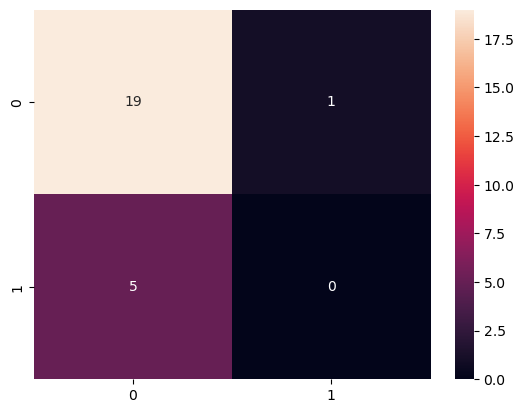

In [66]:
# Plot confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
plt.figure()
sns.heatmap(cm, annot=True, fmt = 'd')

In [67]:
# Plot metrics

from sklearn.metrics import precision_score, recall_score, accuracy_score

print("Precision = {}".format(precision_score(y_test, y_predict, average='macro')))
print("Recall = {}".format(recall_score(y_test, y_predict, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, y_predict)))

Precision = 0.3958333333333333
Recall = 0.475
Accuracy = 0.76


In [68]:
# Delete the end-point
knn_predictor.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: knn-2024-12-09-16-58-36-765
INFO:sagemaker:Deleting endpoint with name: knn-2024-12-09-16-58-36-765
